### comparing python list and numpy

#### first we'll compare speed of both list and numpy
#### idea is we'll add two array in both list and numpy and we'll calculate time taken for rough idea

In [1]:
import numpy as np
import time #to measure time

In [2]:
a= [i for i in range (10000000)]
b= [i for i in range (10000000)]

In [3]:
# adding both a and b
start = time.time()
for i in range(len(a)):
    c=a[i]+b[i]
time.time()-start
    

1.0131852626800537

In [4]:
#now lets try on numpy
a1=np.arange(10000000)
b1=np.arange(10000000,20000000)
start =time.time()
c=a1+b1
time.time()-start

0.016970157623291016

In [5]:
0.85/0.02

42.5

### we can clearly see that numpy is 40 times faster than python list due to->
### python list is dynamic and python stores its elements location ,  in reference memory


# now lets check memory

In [6]:
import sys #to get memory size 
a= [i for i in range (100000000)]
sys.getsizeof(a)

835128600

In [7]:
b=np.arange(100000000)
sys.getsizeof(b)

800000112

#### fancy indexing and boolean indexing

In [8]:
a= np.arange(12).reshape(4,3)

In [9]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [10]:
#suppose from a matrix we want to get 0 th column , 2nd and 3rd from normal slicing we cannot do this so for this purpose 
#from normal slicing we can get 
a[1::2]

array([[ 3,  4,  5],
       [ 9, 10, 11]])

In [11]:
# as we can see that by anyhow we can't get 0th column by anyhow so for this issue we need something called as fancy indexing

In [12]:
#in facing indexing what we do is we pass index as list
a[[0,2,3]]

array([[ 0,  1,  2],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [13]:
#to make things interesting 
b = np.arange(24).reshape(6,4)

In [14]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [15]:
#lets say we want following rows 0,2,3 and 5
b[[0,2,3,5]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [16]:
#now suppose we want to separate 0,1,3 columns
b[:,[0,1,3]]

array([[ 0,  1,  3],
       [ 4,  5,  7],
       [ 8,  9, 11],
       [12, 13, 15],
       [16, 17, 19],
       [20, 21, 23]])

In [17]:
b[::5,[0,3]]

array([[ 0,  3],
       [20, 23]])

 ##### boolean indexing In this indexing we slice elements according to condition ex-give me even elements from matrix

In [18]:
#we are creating a np array with numbers between 1-100 basically 24 elements between 1-100

In [19]:
#np.random.randint(lower limit,upper limit , total elements we want )
a=np.random.randint(1,100,24).reshape(6,4)

# q1. in 'a' get all elements above 50
#### idea-> we'll compare every element with 50 then from this we know that we'll get result in the form of true or false 
#### now from this true or false we can use it as a mask in our original array

In [20]:
#checking condition
a>50

array([[False,  True, False, False],
       [False, False,  True, False],
       [ True,  True, False, False],
       [ True, False, False, False],
       [False,  True, False,  True],
       [ True, False, False,  True]])

In [21]:
#adding mask
a[a>50]

array([73, 87, 88, 75, 66, 67, 83, 97, 73], dtype=int32)

#### q2. get all even number from matrix

In [22]:
a[a%2==0]

array([12,  8,  6, 88, 32, 66, 36,  6, 36], dtype=int32)

#### q2 get all elements greater than 50 and even

In [23]:
a[(a%2==0) & (a>50)] # we're using $ because we're working on boolean values  in simple terms 'and ' is logical and and $ is bitwise and 

array([88, 66], dtype=int32)

In [24]:
#find all elements not divisible by 7
a[a%7!= 0]

array([12, 73, 19, 15,  8, 15, 87,  6, 88, 75, 32, 66,  3, 36, 33,  5, 67,
        6, 83, 97, 36, 43, 73], dtype=int32)

## Broadcasting ~ most important ,confusing and fundamental topic of numpy

#### broadcasting tell how numpy deals with different shapes of array during arithmetic problem
#### through broadcasting we can add two array with different shapes 
### rule 1 
#### so how does it works? basically it add 1 to the head of lower shapes array for operations . for example (3,2) and (3) these two are some array so in this case ideally we cannot perform any operation but we can through broadcasting we'll make other array as 1,3 
### rule 2 
#### stretch dimension of smaller array from 1 till needed for an  example 4,3 and 3 so acc to rule one we'll add 1 before 3 so it will become 1,3 and we will stretch 1 till 4
### rule 3
#### if there is dimension whose shape is not one in either of two array then it cannot be broadcasted
### use of broadcasting-?
#### numpy avoid loops and uses concept of broadcasting for vectorisation

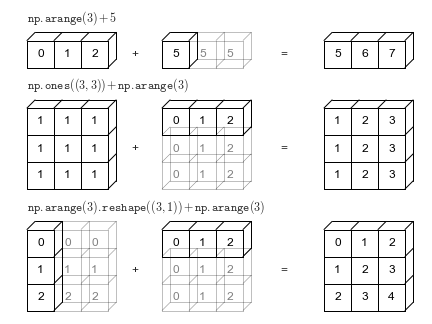

In [25]:
# q1
a = np.arange(12).reshape(4,3)
b = np.random.randint(1,12,3)

In [26]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [27]:
b

array([11,  4,  6], dtype=int32)

In [28]:
# now according to rule one we'll add 1 to the head of our lower array ie b . and then we'll stretch it to make it 4 so ideally it will become 4,3

In [29]:
a+b


array([[11,  5,  8],
       [14,  8, 11],
       [17, 11, 14],
       [20, 14, 17]])

In [30]:
#see 1,8,9 was stretched to 4,3  ideally it became something like -:
np.array([[1,8,9],[1,8,9],[1,8,9]])

array([[1, 8, 9],
       [1, 8, 9],
       [1, 8, 9]])

In [31]:
# q2
a=np.arange(12,24).reshape(3,4)
b=np.arange(3)

In [32]:
a

array([[12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [33]:
b

array([0, 1, 2])

#### now in q2 we can clearly notice that even after broadcasting we can only make our array b to 3,3 but it should be 3,4. So broadcasting will not work

In [34]:
a+b #we'll get error

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [ ]:
#q3
a=np.arange(3).reshape(1,3)
b=np.arange(3,6).reshape(3,1)

In [ ]:
a

In [ ]:
b

In [ ]:
#now in this case our dimensions are already same so rule 1 is already satisfied. so we need to stretch both a and b to 3,3 . 
#and then we can broadcast and do arithmetic operations
a+b

In [ ]:
#just remember if there is no 1 in any dimenstion we cannot even stretch 
# see below two examples
a=np.arange(4).reshape(2,2)
b=np.arange(1)

In [ ]:
#in this case we can broadcaste easily
a+b

In [ ]:
#but below in this case->
a=np.arange(12).reshape(3,4)
b=np.arange(20).reshape(5,4)


In [ ]:
#in this case we cannot because dimensions are already same and we cannot stretch because one is now available

In [ ]:
a+b